In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fake_reg.csv to fake_reg.csv


In [ ]:
df = pd.read_csv('fake_reg.csv')

In [ ]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


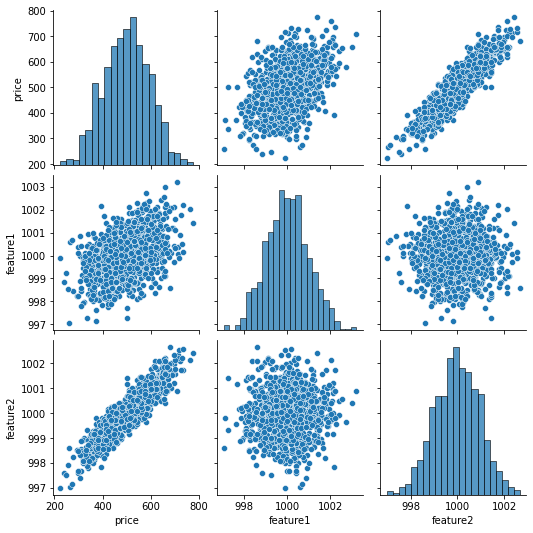

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['feature1','feature2']].values # we have to numpy arrays instead of pandas dataframe/series for TF to work
y = df['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.shape

(1000, 2)

In [ ]:
X_train.shape

(700, 2)

In [ ]:
X_test.shape

(300, 2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train) # calculates the parameter it needs to perform the scaling, STD,mean,max

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [ ]:
X_train.max()

1.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# model = Sequential([Dense(4,activation='relu'),
#                     Dense(4,activation='relu'),
#                     Dense(1)])

In [ ]:
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='mse')

In [ ]:
model.fit(x=X_train,
          y=y_train,
          epochs=250,
          verbose=1)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 474.6208
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 462.4075
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 450.5148
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 438.9506
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 427.0442
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 413.1042
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 402.3237
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 390.9516
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 380.4106
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 368.6553
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 356.7083
Epoch 12/250
22/22 [==============================] - 0s 1ms/step - loss: 345.4581
Epoch 13/250


In [ ]:
loss_df = pd.DataFrame(model.history.history)

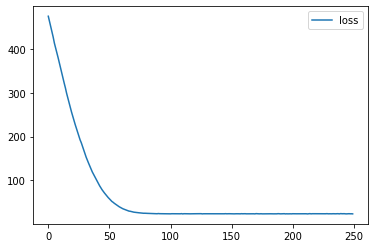

In [ ]:
loss_df.plot()

In [ ]:
model.evaluate(X_test,y_test,verbose=0) # returns model's loss the data it didn't see before

25.360742568969727

In [ ]:
model.evaluate(X_train,y_train,verbose=0)

23.768287658691406

In [ ]:
test_pred = model.predict(X_test)

In [ ]:
# test_pred

In [ ]:
test_pred = pd.Series(test_pred.reshape(300,))
test_pred  

0      405.673248
1      624.228882
2      592.780396
3      572.835754
4      366.931030
          ...    
295    529.595215
296    515.844727
297    610.323181
298    417.361938
299    411.261414
Length: 300, dtype: float32

In [ ]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [ ]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [ ]:
pred_df = pd.concat([pred_df,test_pred],axis=1)
pred_df.head()

,Test True Y,0
0,402.296319,405.673248
1,624.156198,624.228882
2,582.455066,592.780396
3,578.588606,572.835754
4,371.224104,366.931030


In [ ]:
pred_df.columns = ['Test True Y','Model Predictions']

In [ ]:
pred_df.head()

,Test True Y,Model Predictions
0,402.296319,405.673248
1,624.156198,624.228882
2,582.455066,592.780396
3,578.588606,572.835754
4,371.224104,366.931030


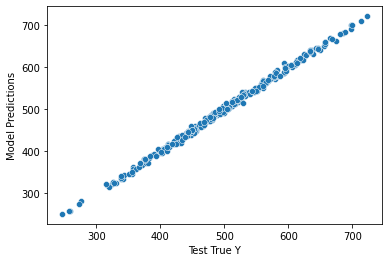

In [ ]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.051055066761746

In [ ]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions']) # same as model.evaluate(X_train,y_train,verbose=0) since our model was mse

25.360747193558165

In [ ]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions']) ** 0.5 # Root MSE

5.035945511377001

In [ ]:
new_gem = [[998,1000]]
new_gem = scaler.transform(new_gem)

In [ ]:
model.predict(new_gem)

array([[420.07645]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_gem_model.t1')

INFO:tensorflow:Assets written to: my_gem_model.t1/assets


In [ ]:
later_model = load_model('my_gem_model.t1')

In [ ]:
later_model.predict(new_gem)

array([[420.07645]], dtype=float32)